In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [16]:
colnames = ["cube.png", "earth.png", "MSUStadium.png", "sparty.png"]
times = pd.read_csv("times.csv", header=None, index_col=0, names=colnames)

In [17]:
times[colnames] = times[colnames].astype(float)
times = pd.concat([times, times.sum(axis=1).rename("Total")], axis=1)
times

,cube.png,earth.png,MSUStadium.png,sparty.png,Total
Serial (No Changes),0.2386,8.6005,0.3214,0.2578,9.4183
Serial (gcc -O1),0.0816,3.2103,0.1428,0.0968,3.5315
Serial (gcc -O2),0.0842,3.2100,0.1448,0.0986,3.5376
Serial (gcc -O3),0.0856,3.1397,0.1450,0.0980,3.4683
Serial (gcc -Ofast),0.1033,3.0670,0.1449,0.0978,3.4130
Serial (Flip Loops: Avg),0.2549,8.6120,0.3303,0.2651,9.4623
Serial (Flip Loops: GradOut),0.2548,10.4104,0.3272,0.2594,11.2518
Serial (Flip Loops: GradIn),0.2563,8.8933,0.3367,0.2708,9.7571
Serial (Flip Loops: GradBoth),0.2478,8.2549,0.3253,0.2606,9.0886
Serial (Flip Loops: Thresh),0.2504,9.5756,0.3238,0.2570,10.4068


In [21]:
indexMask = lambda string, df: np.array([string in idx for idx in df.index])
mask_unchanged = indexMask("Serial (No Changes)", times)
mask_serial = indexMask("Serial", times)
mask_comp_opt = indexMask("gcc -O", times)
mask_flip_loops = indexMask(":", times)

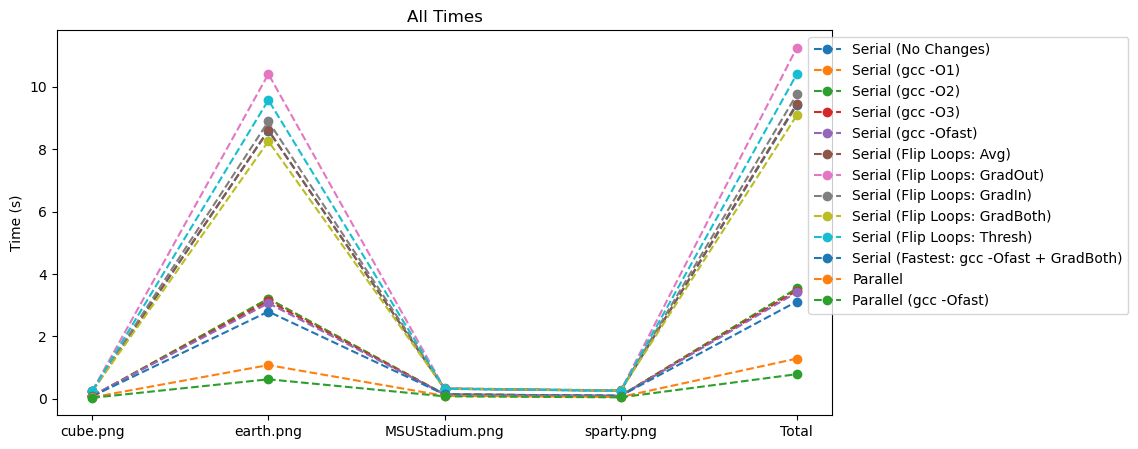

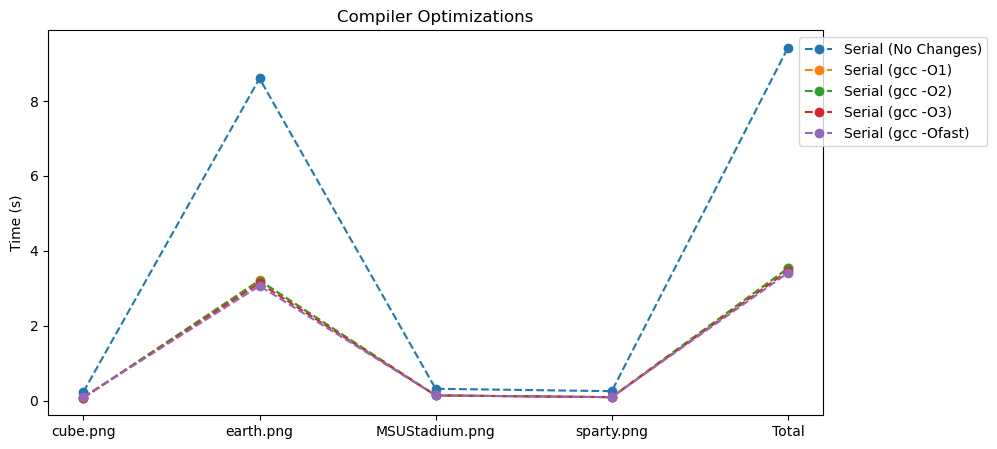

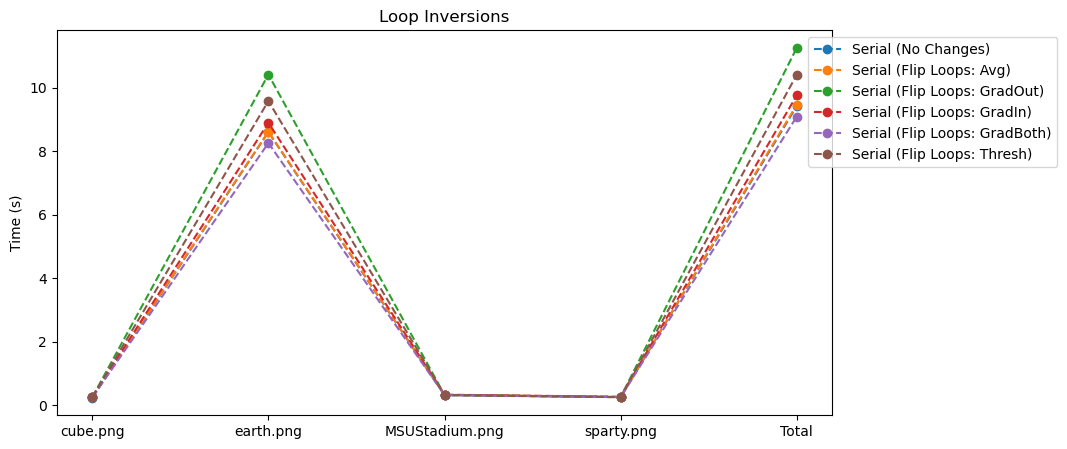

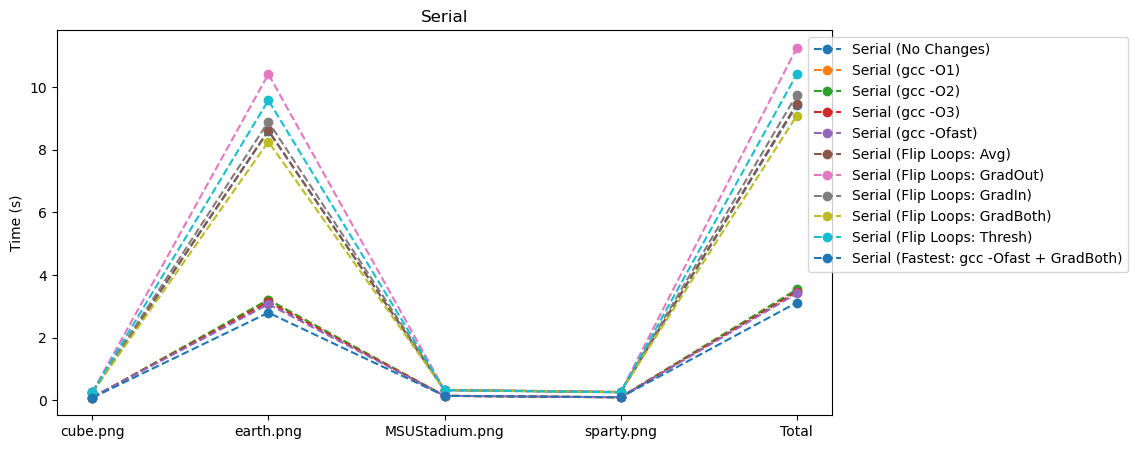

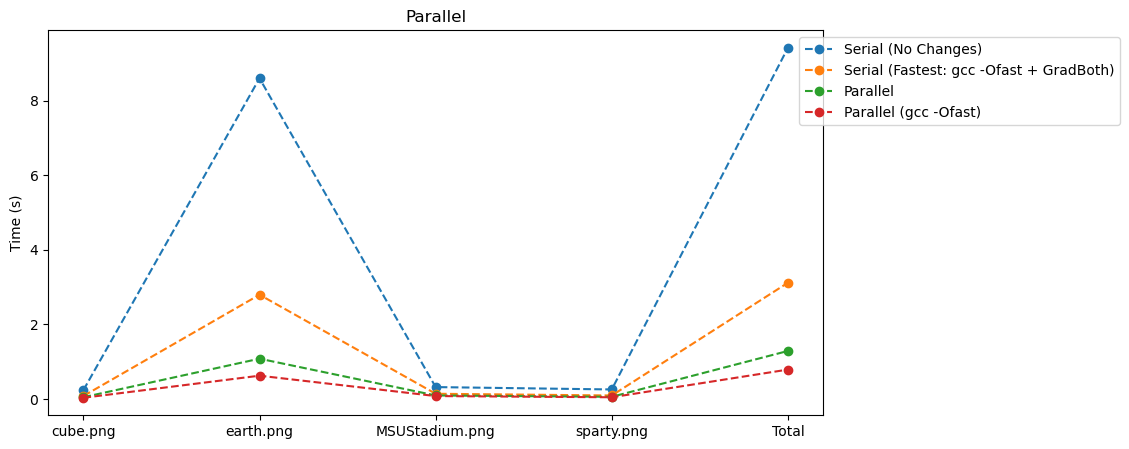

In [39]:
def performancePlot(times, title=None):
    plt.figure(figsize=(10, 5))
    for idx in times.index:
        plt.plot(times.loc[idx], "o--", label=idx)
    plt.title(title)
    plt.ylabel("Time (s)")
    plt.legend(bbox_to_anchor=(0.96, 1))
    plt.savefig(title.replace(" ", "") + ".png", bbox_inches="tight")

performancePlot(times, "All Times")
performancePlot(times[mask_unchanged | (mask_comp_opt & mask_serial & ~mask_flip_loops)], "Compiler Optimizations")
performancePlot(times[mask_unchanged | (mask_flip_loops & ~ mask_comp_opt)], "Loop Inversions")
performancePlot(times[mask_serial], "Serial")
performancePlot(times[mask_unchanged | (~mask_serial) | (mask_comp_opt & mask_flip_loops)], "Parallel")